# Comparaciones entre distribuciones y correlaciones
## Una aclaración entre conceptos y formalismos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('C:/Users/guill/OneDrive/Documentos/Tesis/Proyect/15_de_marzo/Ni_100/Ni-FCC_d.txt', sep= '\\s+')

In [ ]:
normalization_factor = pow(file['h(r)'].mean(), -1.0)
file.loc[:, file.columns != '#r(A)'] = file.loc[:, file.columns != '#r(A)'] * normalization_factor
print('Normalization Factor:', normalization_factor)

Normalization Factor: 16.000009600005757


## Zero Approach
Partiendo de la definición 

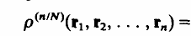 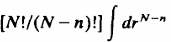 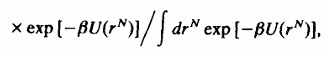

tenemos la función de distribución radial

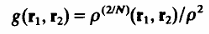

Definición de $G(r)$ total en la literatura (mediante termodinámica/MD), también con la llamada función de correlación total $H(r)$ y su relación con el método PDF:

$G(r) = g(r_1,r_2) = H(r) + 1 = \frac{\rho^{PDF}(r)}{\rho_{0}} (\sum_{i=1}^{N} c_i \bar{b_i})^2$

donde $c_i$ es la proporción de especies $i$ en el material, en cambio nosotros usamos el formalismo de PDFFIT:

$G^{PDF}(r) = 4 \pi r [\rho^{PDF}(r) - \rho_0]$

donde

$\rho^{PDF} = \rho_0 G'(r)$

y 

$G'(r) = (\sum_{i=1}^{N} c_i \bar{b_i})^{-2} \sum_{i,j=1}^{N} c_i c_j \bar{b_i} \bar{b_j} g_{i,j} (r)$

y para eso se define la función de correlación $g_{i,j}(r)$ como:

$g_{i,j}(r)= \frac{n_{i,j}(r)}{4\pi r^2 dr \rho c_{j} \rho_{0}}$

donde $\rho_0 = N/V$ y $n_{i,j(r)}$ son el numero de partículas de tipo j entre r y $r + dr$ desde una partícula de tipo i.

las funciones G'(r) y G^{PDF}(r) tienen los valores límites:

$G'(r<r^0) = 0$

$G'(r\rightarrow \infty) = 1$

$G^{PDF}(r<r^0) \approx -4\pi r \rho_0$

$G^{PDF}(r\rightarrow \infty) = 0$

donde $\rho_0$ es la densidad atómica promedio.

Por lo tanto tenemos que:

$G^{PDF}(r) = 4 \pi \rho_0 r [G'(r) - 1]$

$\rho^{PDF} \propto \rho_0 G(r)$

$G(r) \propto \frac{G^{PDF}(r)}{4 \pi r \rho_0} + 1$


0.0625 16.000009600005757
24.02 0.9943006427976625


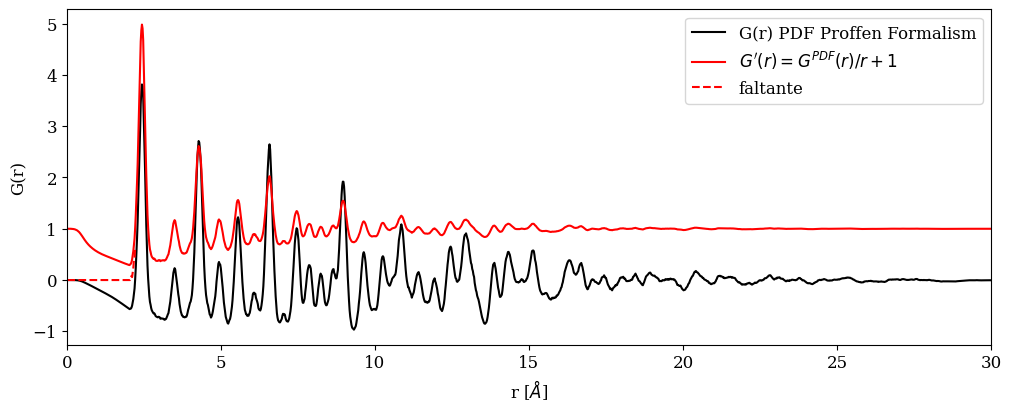

In [273]:
data = file.copy()
fig, ax =plt.subplots(figsize=(10,4), layout='constrained')
ax.plot(data['#r(A)'], data['G(r)'], color = 'black', label = 'G(r) PDF Proffen Formalism')

mean_density = data['Base'].mean()
print(1/16, normalization_factor)
scale_factor = 0.5*4*3.1416/normalization_factor # 4*pi*rho_0
g_r = pow(scale_factor,-1)*(data['G(r)']/data['#r(A)']) + 1
# g_r = (data['G(r)']/data['#r(A)']) + 1

print(data['#r(A)'].iloc[1200],g_r.loc[1200])

# ax.plot(data['#r(A)'].loc[108:], g_r.loc[108:], color = 'red', label = "$G'(r)= G^{PDF}(r)/r+1$")
ax.plot(data['#r(A)'], g_r, color = 'red', label = "$G'(r)= G^{PDF}(r)/r+1$")
ax.plot(data['#r(A)'].loc[0:110], data['h(r)'].loc[0:110], color = 'red', linestyle='--', label = 'faltante')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,30])
ax.set_ylabel('G(r)')
ax.legend()
plt.rc('font', size=12)
plt.rcParams['font.family'] = 'serif'
plt.show()

0.0625 16.000009600005757
24.02 -0.043870109586012465


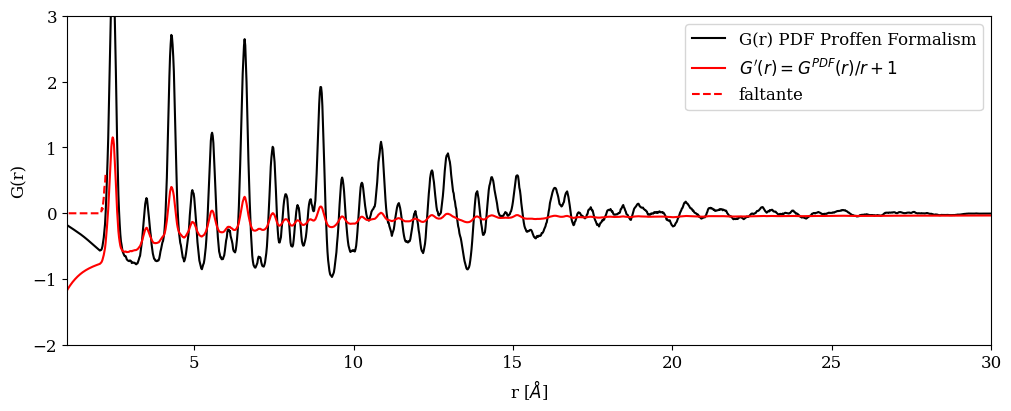

In [298]:
data = file.copy()
fig, ax =plt.subplots(figsize=(10,4), layout='constrained')
ax.plot(data['#r(A)'], data['G(r)'], color = 'black', label = 'G(r) PDF Proffen Formalism')

mean_density = data['Base'].mean()
print(1/16, normalization_factor)
# scale_factor = 0.5*4*3.1416/normalization_factor # 4*pi*rho_0
scale_factor = 1
g_r = pow(scale_factor,-1)*(data['G(r)']-1)/data['#r(A)']
# g_r = (data['G(r)']/data['#r(A)']) + 1

print(data['#r(A)'].iloc[1200],g_r.loc[1200])

# ax.plot(data['#r(A)'].loc[108:], g_r.loc[108:], color = 'red', label = "$G'(r)= G^{PDF}(r)/r+1$")
ax.plot(data['#r(A)'], g_r, color = 'red', label = "$G'(r)= G^{PDF}(r)/r+1$")
ax.plot(data['#r(A)'].loc[0:110], data['h(r)'].loc[0:110], color = 'red', linestyle='--', label = 'faltante')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([1,30])
ax.set_ylim([-2, 3])
ax.set_ylabel('G(r)')
ax.legend()
plt.rc('font', size=12)
plt.rcParams['font.family'] = 'serif'
plt.show()

In [276]:
exp = pd.DataFrame()

df_exp = pd.read_csv('../04_26_2024_comparision_variables/Post-PtPdCo-PDF.csv', sep = '\\s+', header=None, names=['r','G(r)'])
df_exp = df_exp.replace('--',np.nan).dropna()
rest_df_exp = df_exp["G(r)"].iloc[1::2].astype(float)
rest_df_exp = rest_df_exp.reset_index(drop=True)
rest_df_exp.index *= 0.02

exp['exp'] = rest_df_exp

C:\Users\guill\AppData\Local\Temp\ipykernel_8016\503200174.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


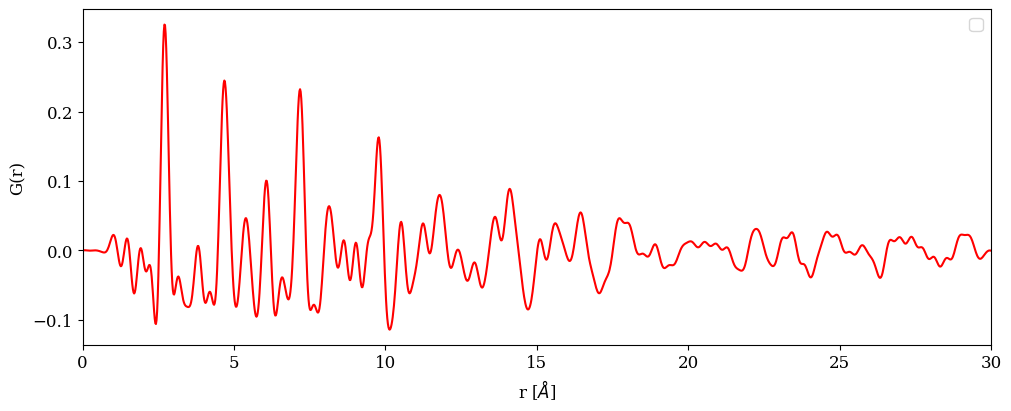

In [284]:
fig, ax =plt.subplots(figsize=(10,4), layout='constrained')

ax.plot(exp.index, exp['exp'], color = 'red')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,30])
ax.set_ylabel('G(r)')
ax.legend()
plt.rc('font', size=12)
plt.rcParams['font.family'] = 'serif'
plt.show()

## Density Aprroach
Trying with an exponential function

In [35]:
import plotly.express as px
density = pd.read_csv('Ni_100/density.txt', sep='\\s+')
density.index = density['#r(A)']
density = density.drop(columns=['#r(A)'])
density.head()

,ρ(r)_raw,ρ_smooth(r),Base
#r(A),,,
0.01,0.0,0.0,0.0
0.03,0.0,0.0,0.0
0.05,0.0,0.0,0.0
0.07,0.0,0.0,0.0
0.09,0.0,0.0,0.0


In [36]:
px.line(density, title='Density of Ni 100')

In [39]:
px.line(density['ρ_smooth(r)']*density.index.values, title='Density of Ni 100')

## Second Approach
Almost-Perfect, but unrealistic.

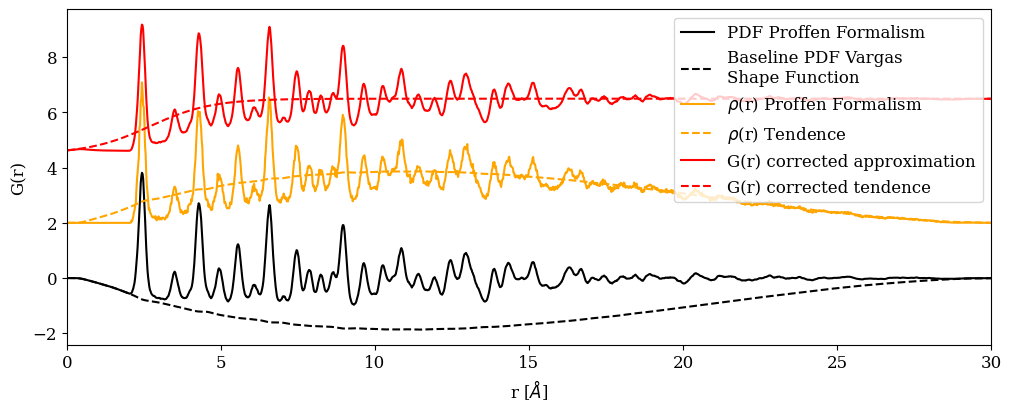

In [105]:
data = file.copy()
fig, ax =plt.subplots(figsize=(10,4), layout='constrained')
ax.plot(data['#r(A)'], data['G(r)'], color = 'black', label = 'PDF Proffen Formalism')
ax.plot(data['#r(A)'], -1.0*data['Base'], color = 'black', label = 'Baseline PDF Vargas \nShape Function', linestyle='--')

ax.plot(data['#r(A)'], data['h(r)']+2, color = 'orange', label = '$\\rho$(r) Proffen Formalism')
ax.plot(data['#r(A)'], data['Base']+2, color = 'orange', label = '$\\rho$(r) Tendence', linestyle='--')



transformation_function = 0.5 + (1 + np.tanh(0.5*(data['#r(A)'] - 2.7)))
# aproximation = data['Base'] + transformation_function
aproximation = transformation_function

# ax.plot(data['#r(A)'], aproximation*-1, color = 'red', label = 'Approximation Correction', linestyle='--')

# ax.plot(data['#r(A)'], transformation_function*-1, color = 'red', label = 'Transformation Function')
# ax.plot(data['#r(A)'], g_r, color = 'red', label = 'G(r) PFC Formalism')

g_r_aproximation = data['G(r)'] + transformation_function
ax.plot(data['#r(A)'], g_r_aproximation+4, color = 'red', label = 'G(r) corrected approximation')
ax.plot(data['#r(A)'], aproximation+4, color = 'red', label = 'G(r) corrected tendence', linestyle='--')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,30])
ax.set_ylabel('G(r)')
ax.legend()
plt.rc('font', size=12)
plt.rcParams['font.family'] = 'serif'
plt.show()

## Third Approach
A more realistic approach, but less perfect than last one.

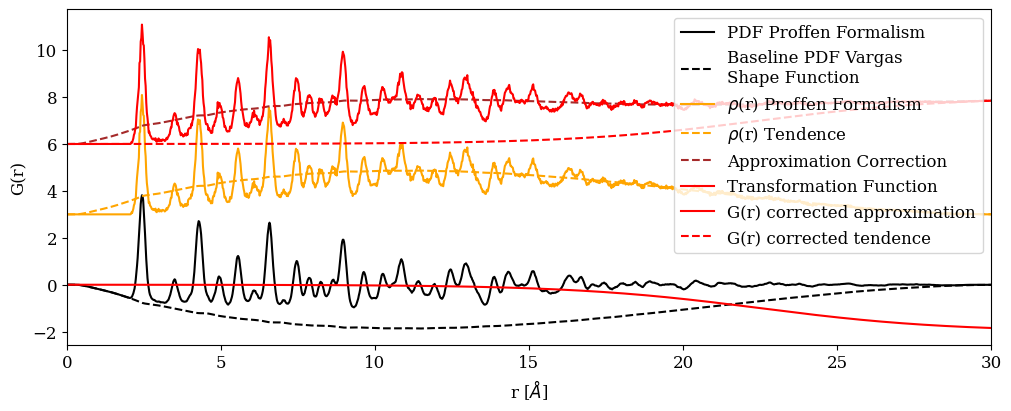

In [106]:
data = file.copy()
fig, ax =plt.subplots(figsize=(10,4), layout='constrained')
ax.plot(data['#r(A)'], data['G(r)'], color = 'black', label = 'PDF Proffen Formalism')
ax.plot(data['#r(A)'], -1.0*data['Base'], color = 'black', label = 'Baseline PDF Vargas \nShape Function', linestyle='--')

ax.plot(data['#r(A)'], data['h(r)']+3, color = 'orange', label = '$\\rho$(r) Proffen Formalism')
ax.plot(data['#r(A)'], data['Base']+3, color = 'orange', label = '$\\rho$(r) Tendence', linestyle='--')



transformation_function = 1 + np.tanh(0.166*(data['#r(A)'] - 22.5))
# aproximation = data['Base'] + transformation_function
aproximation = transformation_function

ax.plot(data['#r(A)'], 6+data['Base']+aproximation, color = 'brown', label = 'Approximation Correction', linestyle='--')

ax.plot(data['#r(A)'], transformation_function*-1, color = 'red', label = 'Transformation Function')
# ax.plot(data['#r(A)'], g_r, color = 'red', label = 'G(r) PFC Formalism')

g_r_aproximation = data['h(r)'] + transformation_function
ax.plot(data['#r(A)'], g_r_aproximation+6, color = 'red', label = 'G(r) corrected approximation')
ax.plot(data['#r(A)'], aproximation+6, color = 'red', label = 'G(r) corrected tendence', linestyle='--')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,30])
ax.set_ylabel('G(r)')
ax.legend()
plt.rc('font', size=12)
plt.rcParams['font.family'] = 'serif'
plt.show()

## Fourth Approach
Let's try with a more perfect function, but less realistic.

In [138]:
data = file.copy()

max_baseline = data['Base'].loc[data['Base']==data['Base'].max()]
print(f'Max Baseline: {max_baseline.values[0]} at r = {max_baseline.index[0]*0.02} A')
# new baseline

data.loc[data['#r(A)']>11.36, 'h(r)'] += (1.8702411221446729 - data.loc[data['#r(A)']>11.36, 'Base'])
data.loc[data['#r(A)']>11.36, 'Base'] = 1.8702411221446729

Max Baseline: 1.8702411221446729 at r = 11.36 A


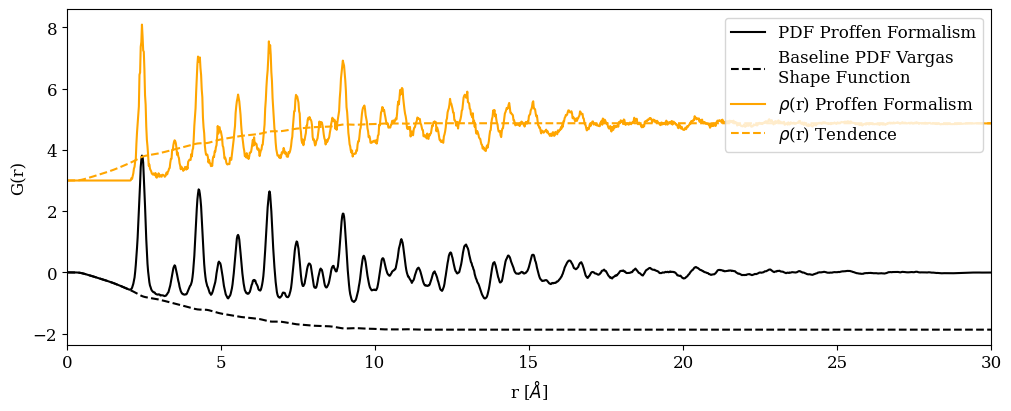

In [140]:
fig, ax =plt.subplots(figsize=(10,4), layout='constrained')
ax.plot(data['#r(A)'], data['G(r)'], color = 'black', label = 'PDF Proffen Formalism')
ax.plot(data['#r(A)'], -1.0*data['Base'], color = 'black', label = 'Baseline PDF Vargas \nShape Function', linestyle='--')

ax.plot(data['#r(A)'], data['h(r)']+3, color = 'orange', label = '$\\rho$(r) Proffen Formalism')
ax.plot(data['#r(A)'], data['Base']+3, color = 'orange', label = '$\\rho$(r) Tendence', linestyle='--')


# ax.plot(data['#r(A)'], 6+data['Base'], color = 'brown', label = 'Approximation Correction', linestyle='--')

# ax.plot(data['#r(A)'], transformation_function*-1, color = 'red', label = 'Transformation Function')
# ax.plot(data['#r(A)'], g_r, color = 'red', label = 'G(r) PFC Formalism')

# g_r_aproximation = data['h(r)'] + transformation_function
# ax.plot(data['#r(A)'], g_r_aproximation+6, color = 'red', label = 'G(r) corrected approximation')
# ax.plot(data['#r(A)'], aproximation+6, color = 'red', label = 'G(r) corrected tendence', linestyle='--')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,30])
ax.set_ylabel('G(r)')
ax.legend(loc='upper right')
plt.rc('font', size=12)
plt.rcParams['font.family'] = 'serif'
plt.show()

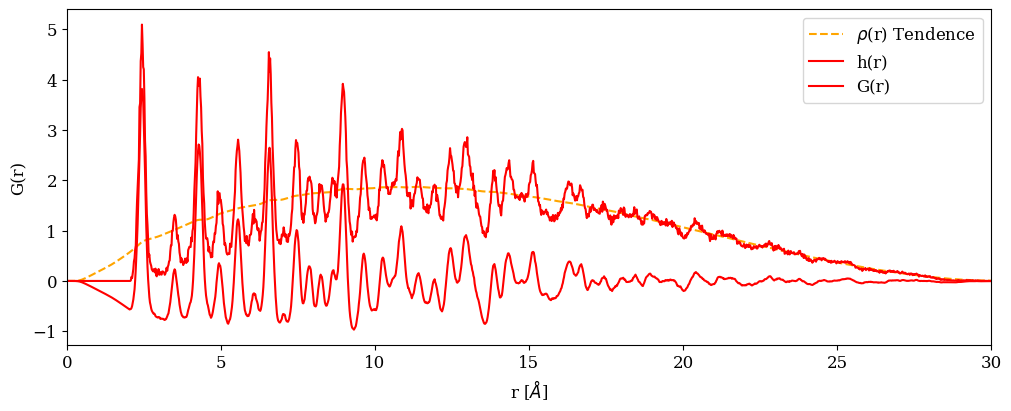

In [157]:
data = file.copy()
fig, ax =plt.subplots(figsize=(10,4), layout='constrained')
# ax.plot(data['#r(A)'], data['G(r)'], color = 'black', label = 'PDF Proffen Formalism')
# ax.plot(data['#r(A)'], -1.0*data['Base'], color = 'black', label = 'Baseline PDF Vargas \nShape Function', linestyle='--')

# ax.plot(data['#r(A)'], data['h(r)']+3, color = 'orange', label = '$\\rho$(r) Proffen Formalism')
ax.plot(data['#r(A)'], data['Base'], color = 'orange', label = '$\\rho$(r) Tendence', linestyle='--')



# transformation_function = 1 + np.tanh(0.166*(data['#r(A)'] - 22.5))
# # aproximation = data['Base'] + transformation_function
# aproximation = transformation_function

# ax.plot(data['#r(A)'], 6+data['Base']+aproximation, color = 'brown', label = 'Approximation Correction', linestyle='--')

# ax.plot(data['#r(A)'], transformation_function*-1, color = 'red', label = 'Transformation Function')
# ax.plot(data['#r(A)'], g_r, color = 'red', label = 'G(r) PFC Formalism')

g_r_aproximation = data['G(r)']*data['#r(A)']
base_aproximation = data['Base']*data['#r(A)'] - 1
# ax.plot(data['#r(A)'], g_r_aproximation, color = 'red', label = 'G(r) corrected approximation')
ax.plot(data['#r(A)'], data['h(r)'], color = 'red', label = 'h(r)')
ax.plot(data['#r(A)'], data['G(r)'], color = 'red', label = 'G(r)')
# ax.plot(data['#r(A)'], base_aproximation, color = 'red', label = 'G(r) corrected tendence', linestyle='--')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,30])
ax.set_ylabel('G(r)')
ax.legend()
plt.rc('font', size=12)
plt.rcParams['font.family'] = 'serif'
plt.show()